In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from pyha import *
from pyha.cores import *
from pyha.cores.util import *
import scipy
from scipy import signal
import warnings
warnings.filterwarnings('ignore') # yolo!
import numpy as np
import inspect

# GitHub cannot display the Table of Contents!

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Info

In [3]:
from pyha.applications.spectrogram_limesdr.spectrogram_limesdr import SpectrogramLimeSDR
print(inspect.getdoc(SpectrogramLimeSDR))
print('\n\nMain interface\n' + inspect.getdoc(SpectrogramLimeSDR.main))

Spectrogram accelerator for LimeSDR Mini.


Main interface
Args:
    input (DataValid): 12 bit IQ, -1.0 ... 1.0 range

Returns:
    DataValid: Upper 32 bits from the spectrogram core.


# Examples

## High power signal

INFO:sim:Tracing is enabled, running "MODEL" and "HARDWARE" simulations
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "HARDWARE" simulation...
100%|██████████| 262144/262144 [03:13<00:00, 1358.12it/s]
INFO:sim:Flushing the pipeline to collect 1024 valid samples (currently have 512)
INFO:sim:Flush took 1061 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


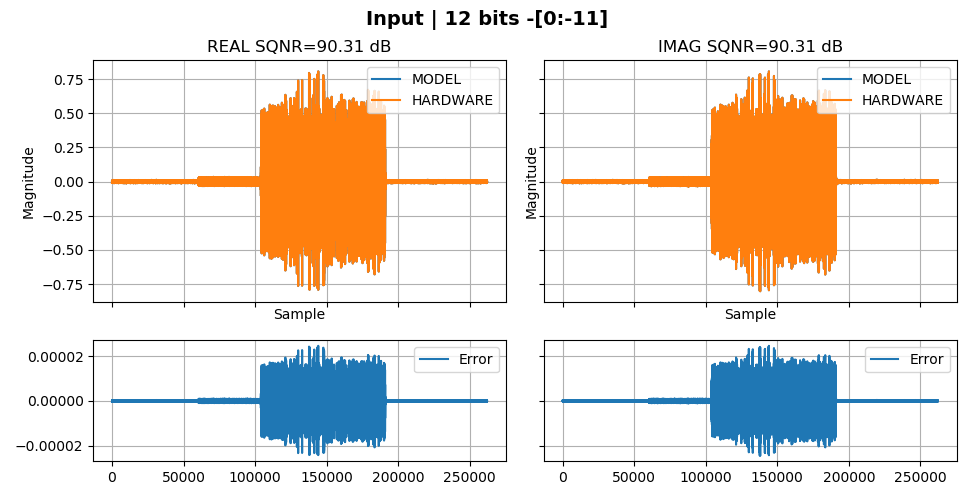

<IPython.core.display.Javascript object>


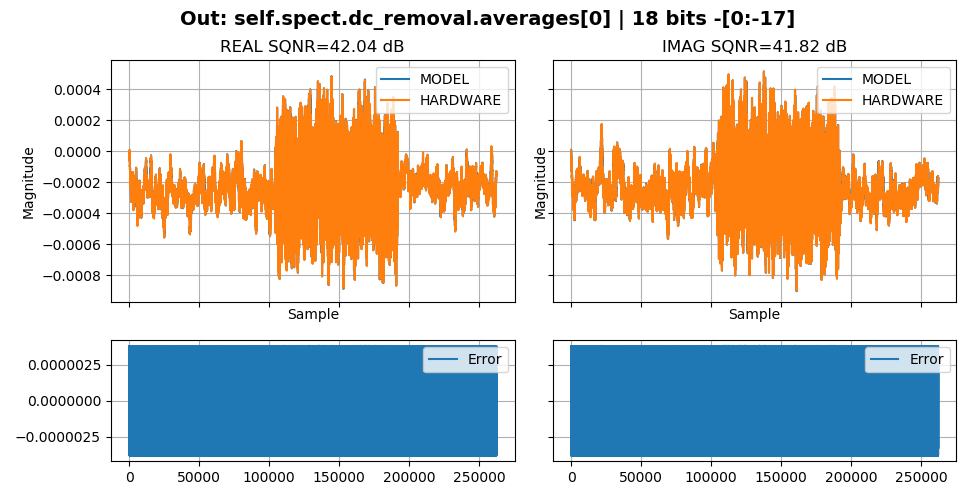

<IPython.core.display.Javascript object>


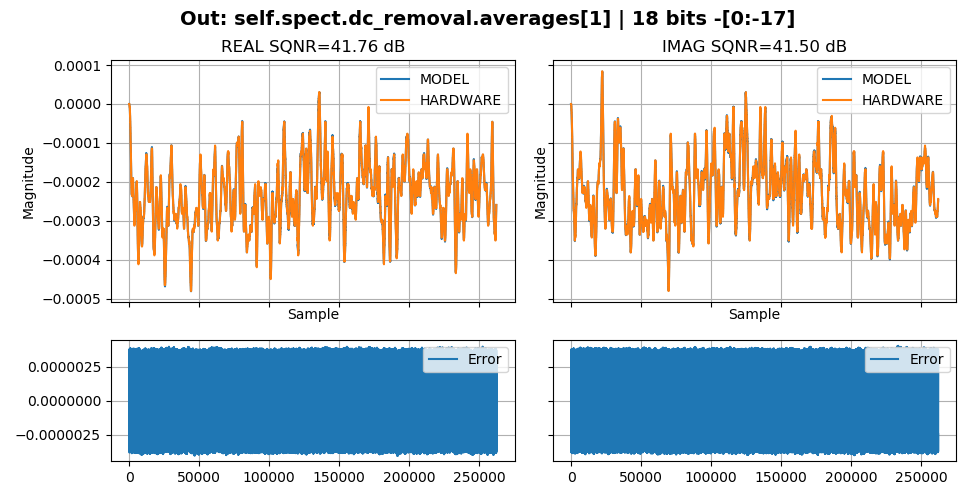

<IPython.core.display.Javascript object>


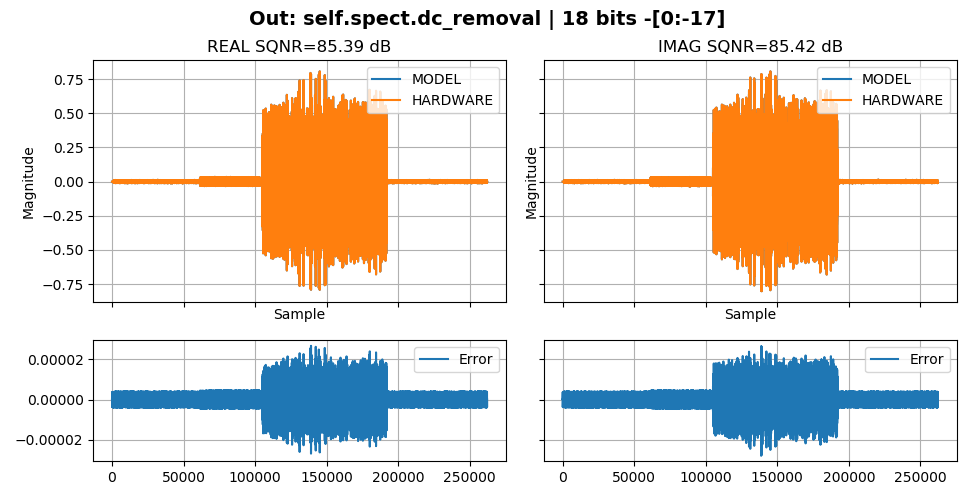

<IPython.core.display.Javascript object>


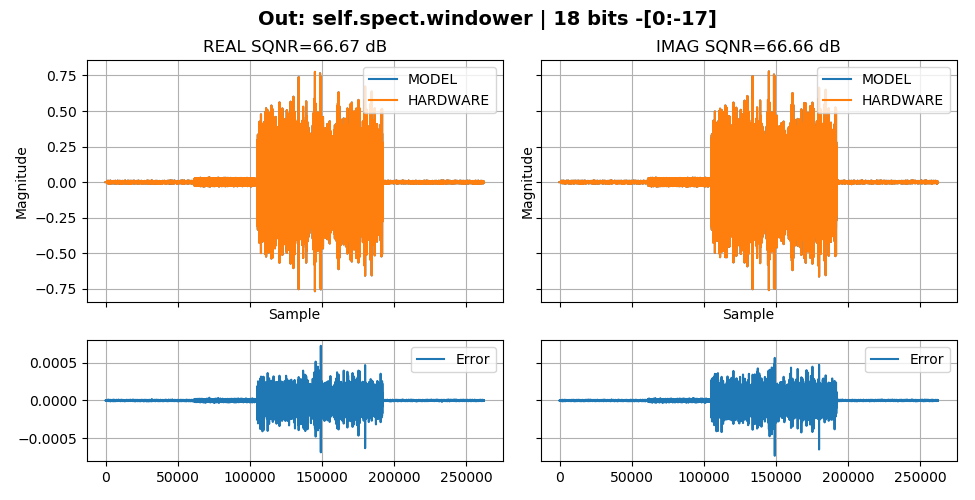

<IPython.core.display.Javascript object>


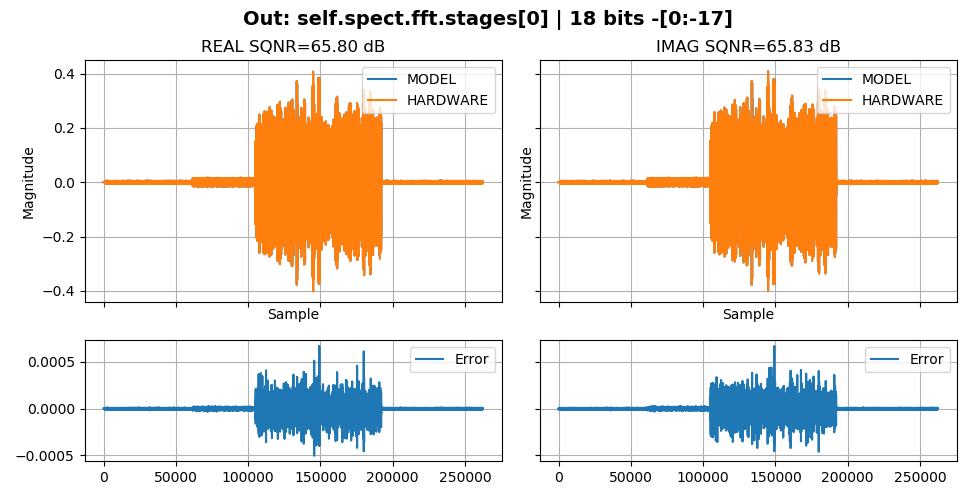

<IPython.core.display.Javascript object>


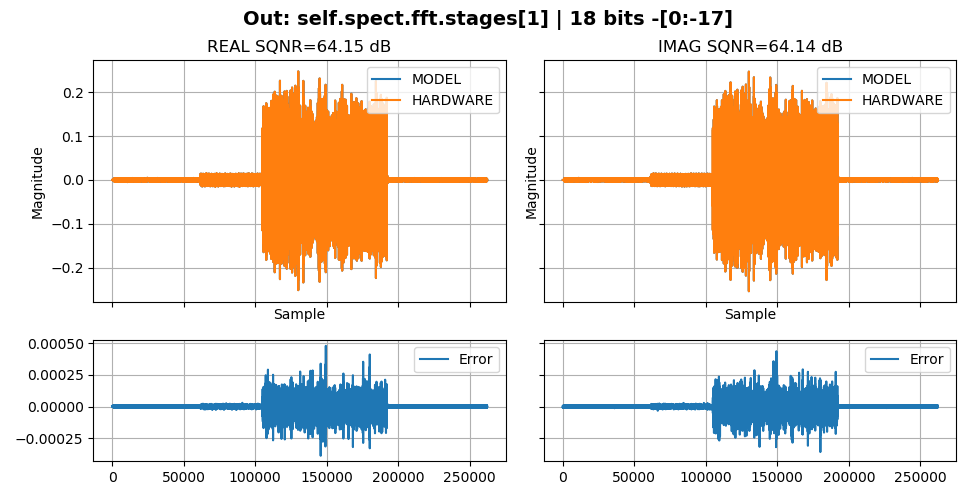

<IPython.core.display.Javascript object>


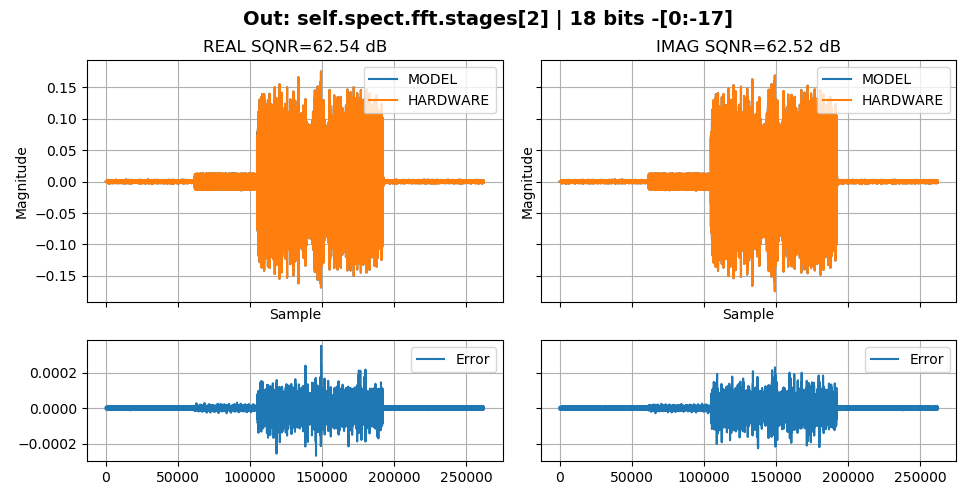

<IPython.core.display.Javascript object>


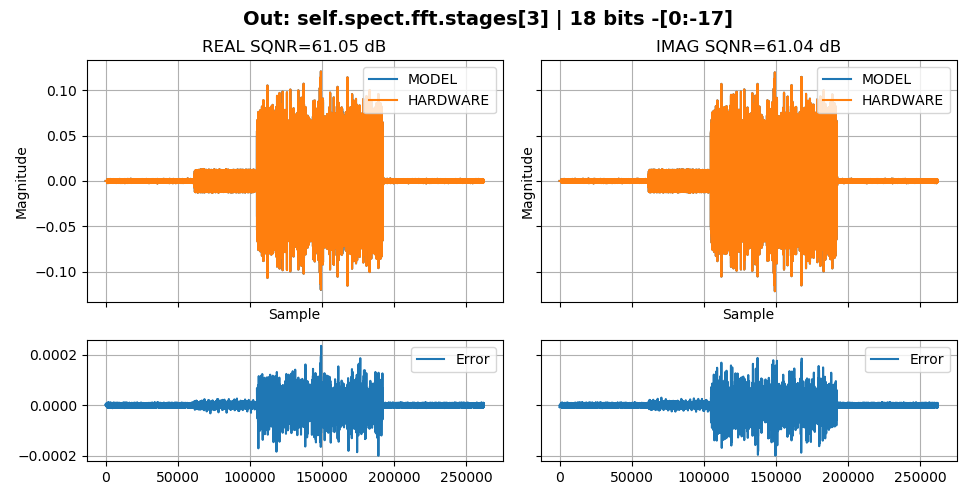

<IPython.core.display.Javascript object>


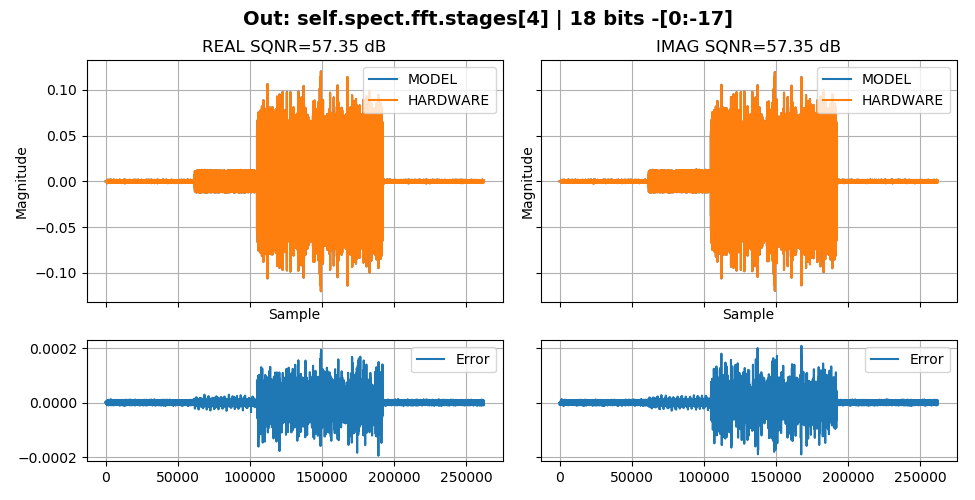

<IPython.core.display.Javascript object>


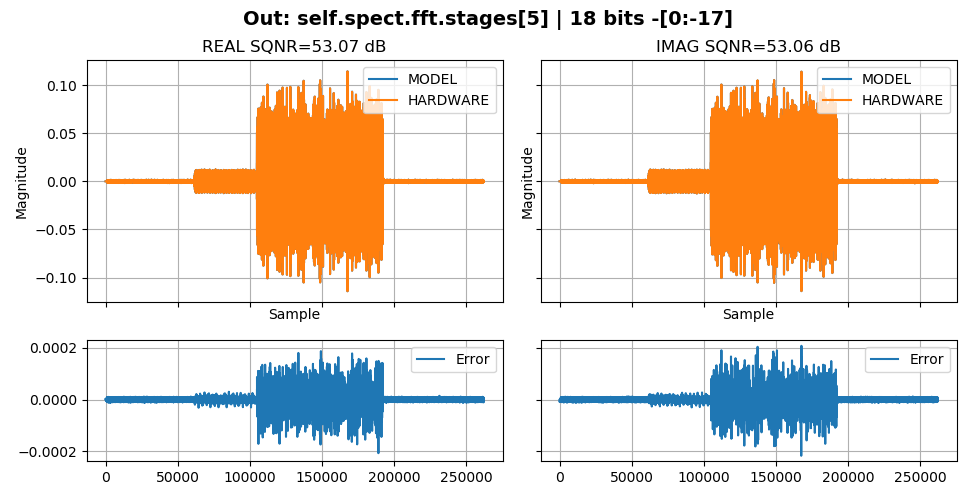

<IPython.core.display.Javascript object>


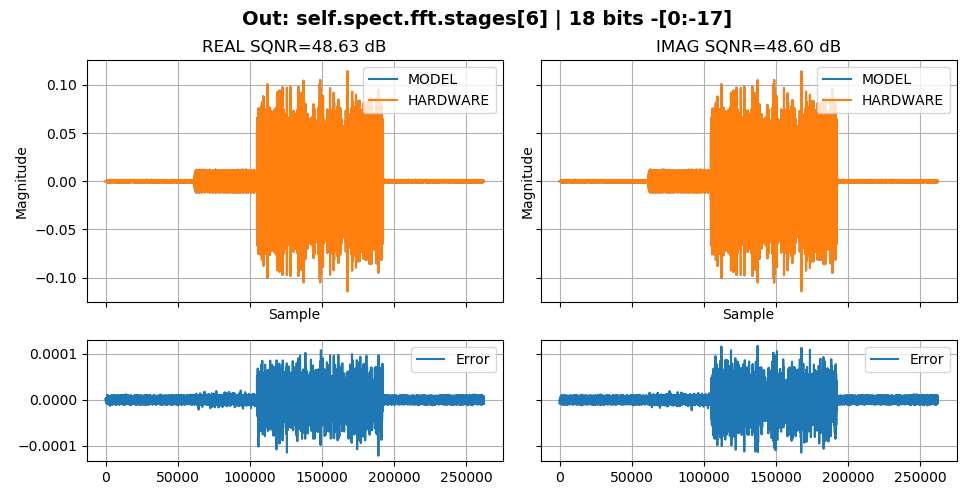

<IPython.core.display.Javascript object>


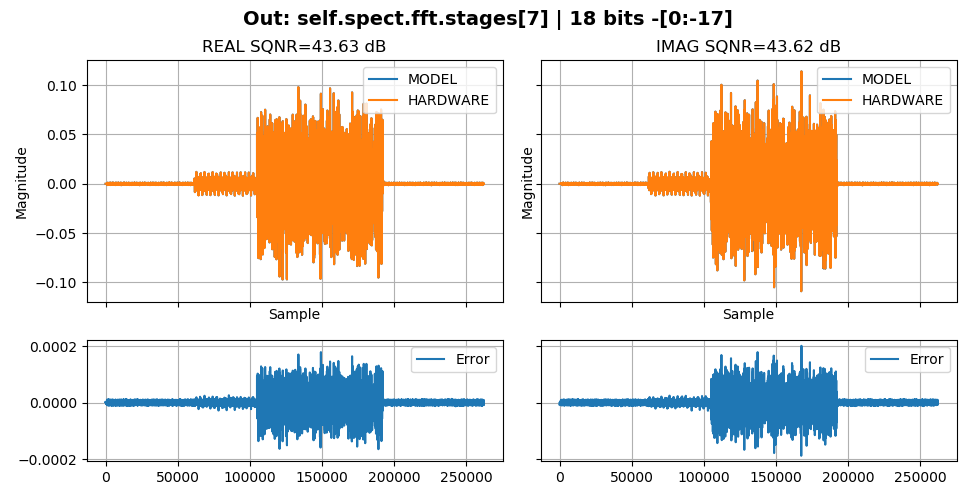

<IPython.core.display.Javascript object>


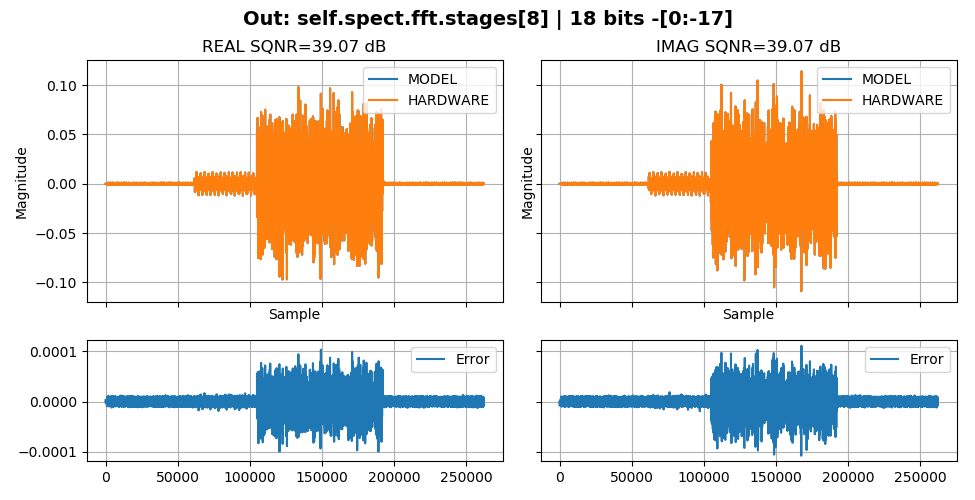

<IPython.core.display.Javascript object>


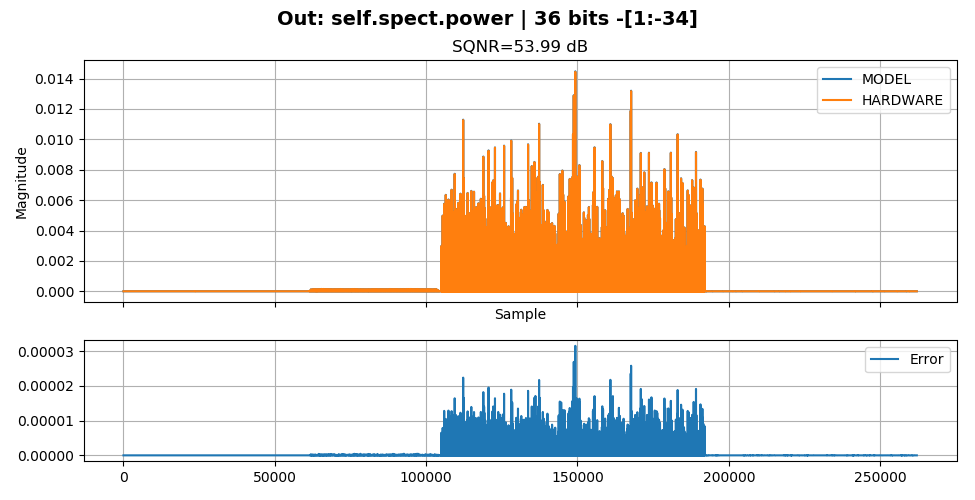

<IPython.core.display.Javascript object>


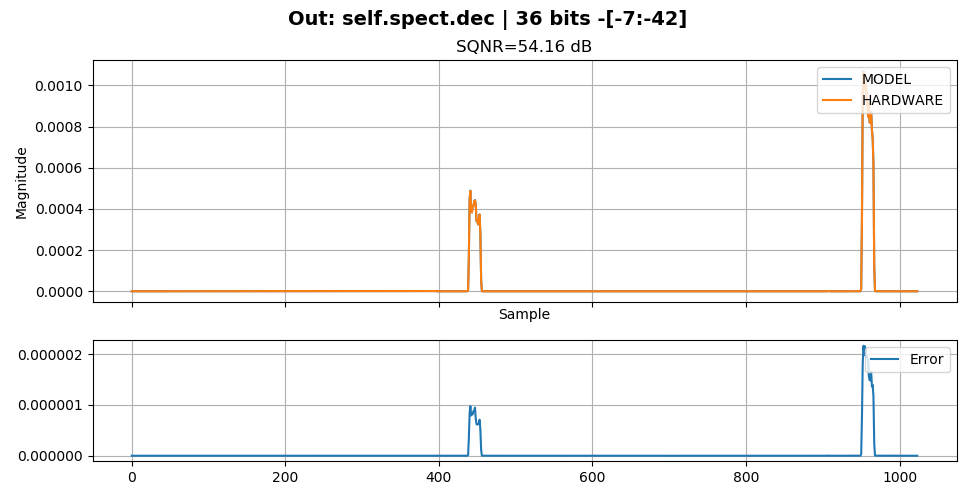

<IPython.core.display.Javascript object>


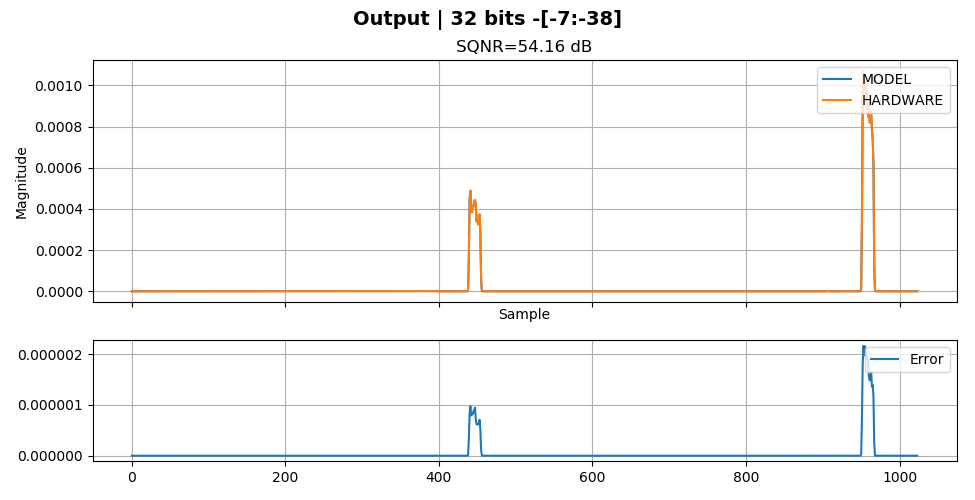

<IPython.core.display.Javascript object>


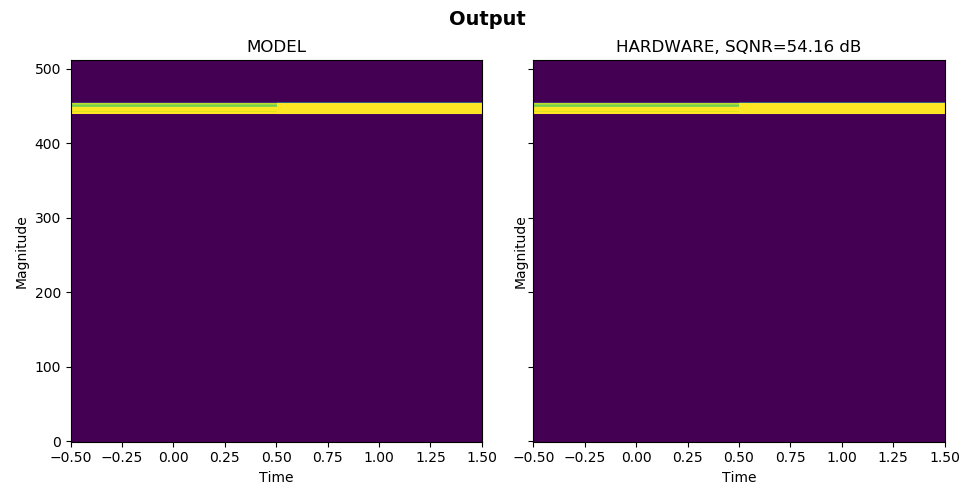

In [4]:
dut = SpectrogramLimeSDR()
crop = dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS
input_signal = load_complex64_file(get_data_file('limem_ph3strong_40m'))
input_signal = input_signal[:len(input_signal) // (crop) * (crop)]

sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto')
plot_trace()
plot_imshow(sims, name='Output', rows=dut.spect.FFT_SIZE // dut.spect.AVG_FREQ_AXIS, transpose=True)

## Low power signal

INFO:sim:Tracing is enabled, running "MODEL" and "HARDWARE" simulations
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "HARDWARE" simulation...
100%|██████████| 262144/262144 [03:09<00:00, 1384.75it/s]
INFO:sim:Flushing the pipeline to collect 1024 valid samples (currently have 512)
INFO:sim:Flush took 1061 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


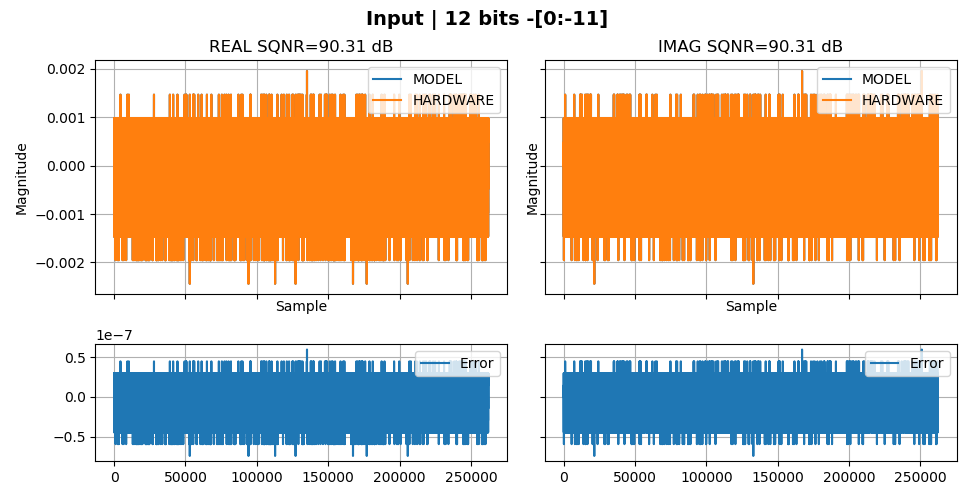

<IPython.core.display.Javascript object>


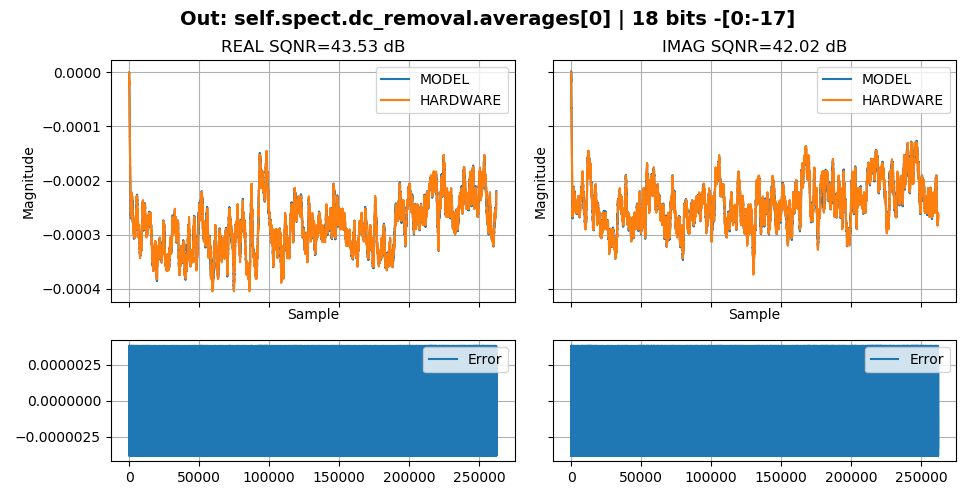

<IPython.core.display.Javascript object>


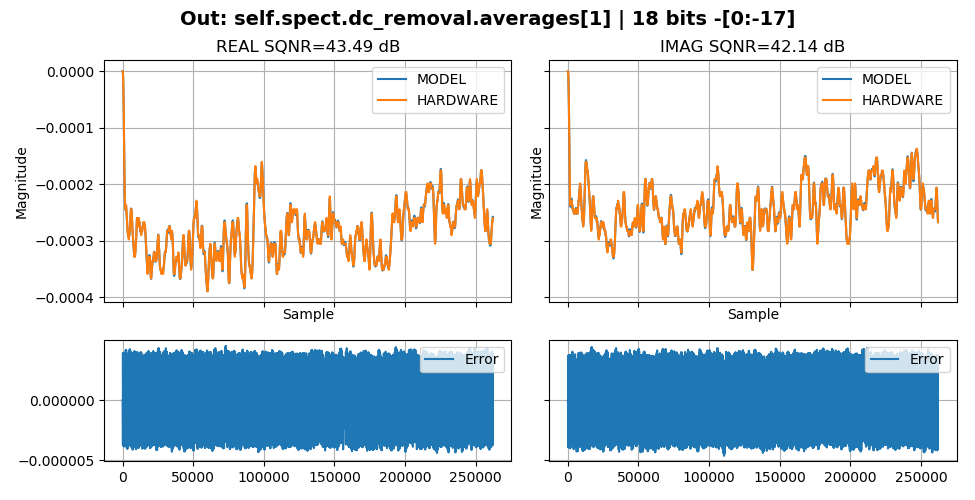

<IPython.core.display.Javascript object>


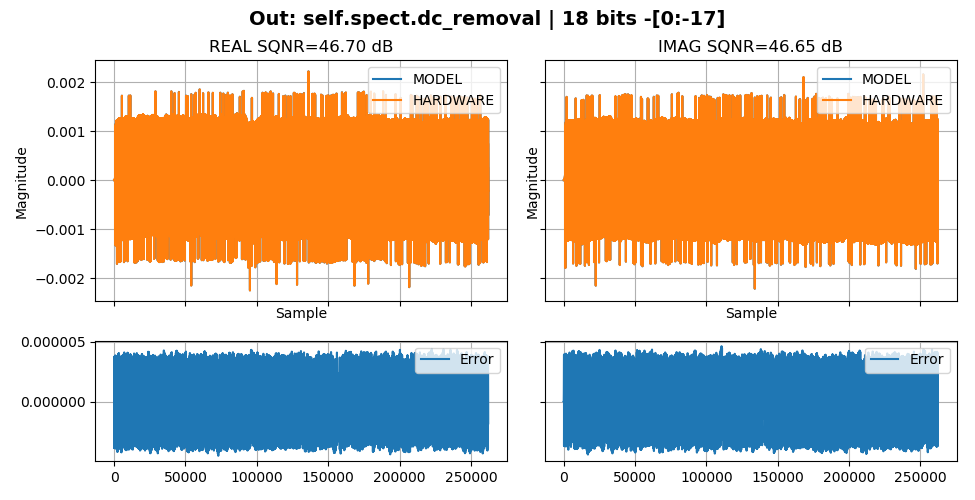

<IPython.core.display.Javascript object>


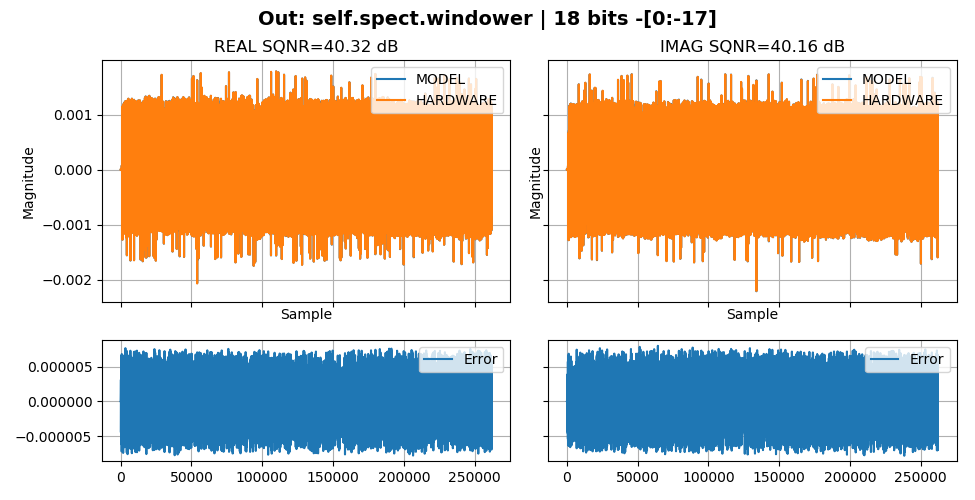

<IPython.core.display.Javascript object>


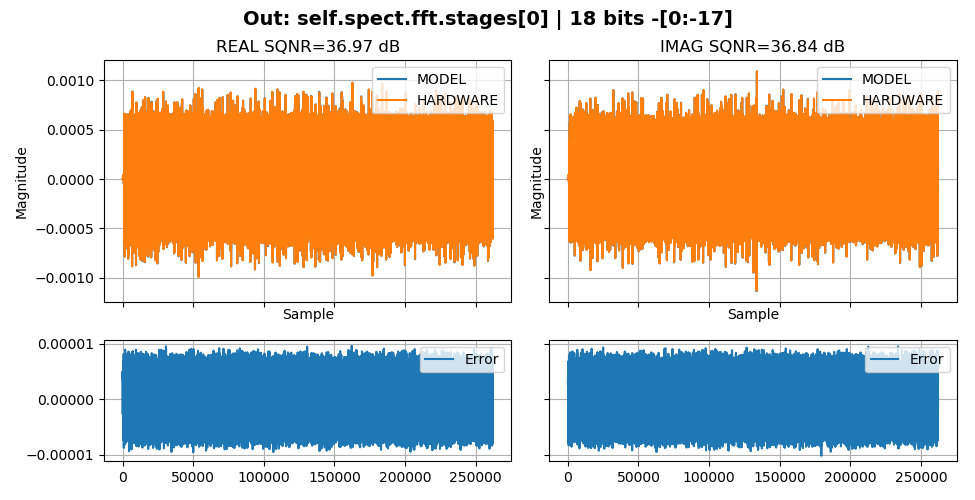

<IPython.core.display.Javascript object>


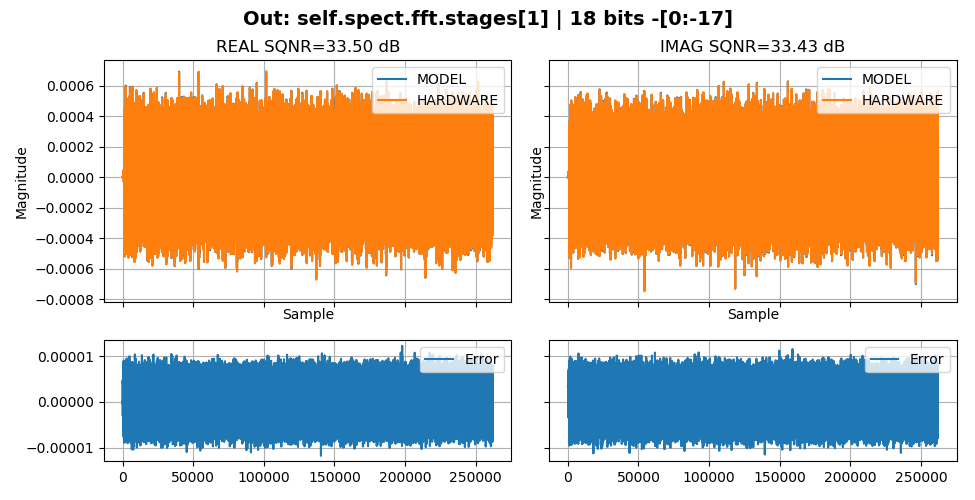

<IPython.core.display.Javascript object>


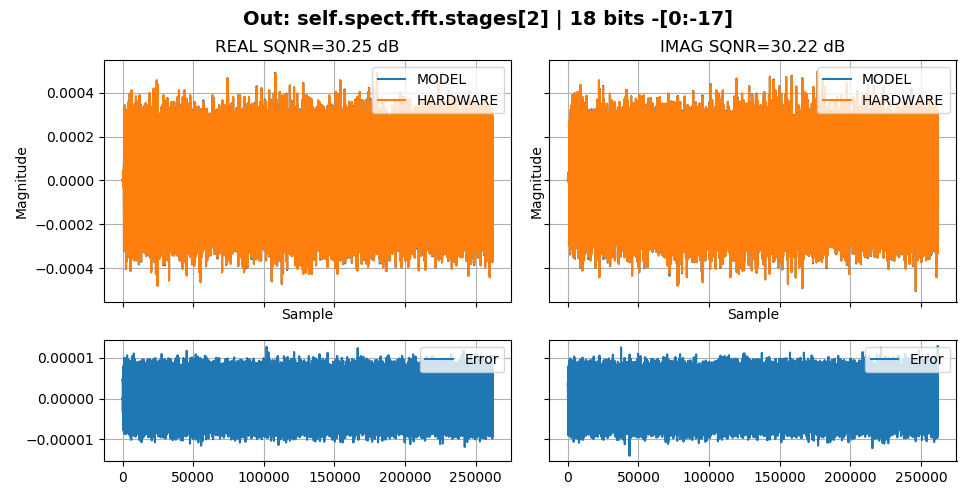

<IPython.core.display.Javascript object>


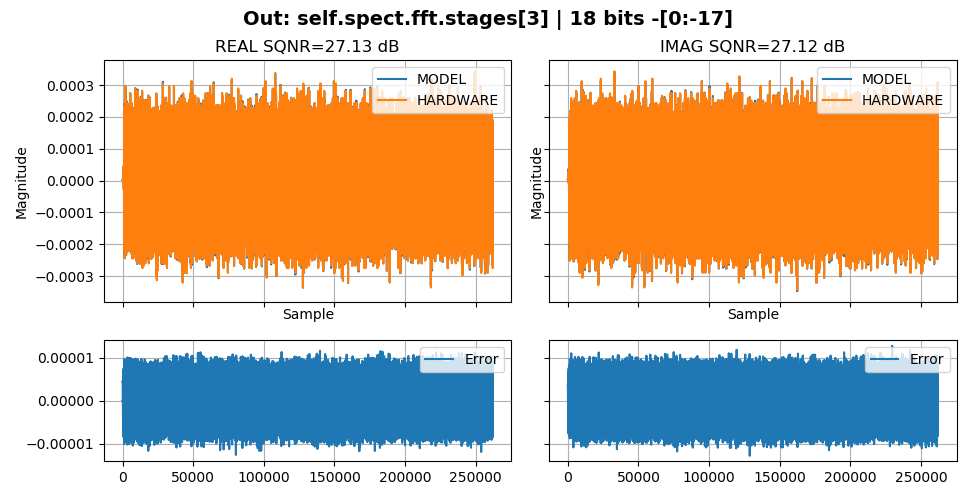

<IPython.core.display.Javascript object>


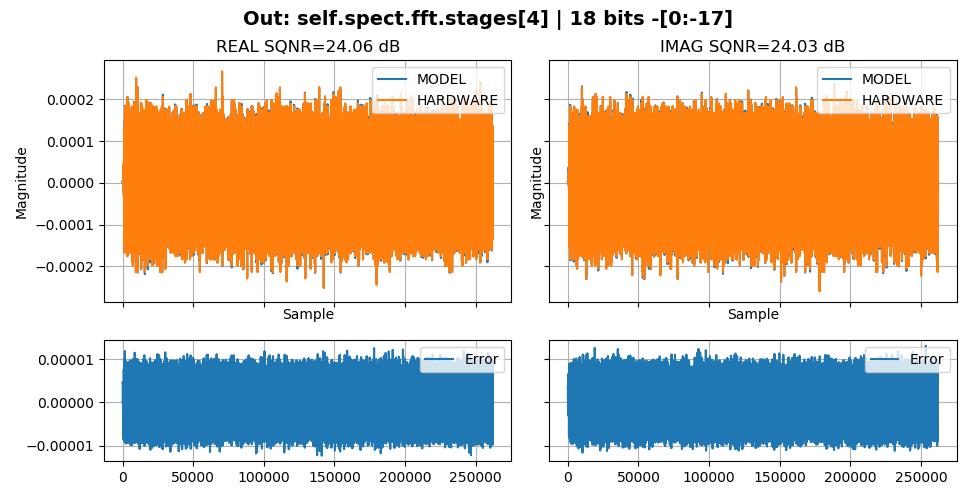

<IPython.core.display.Javascript object>


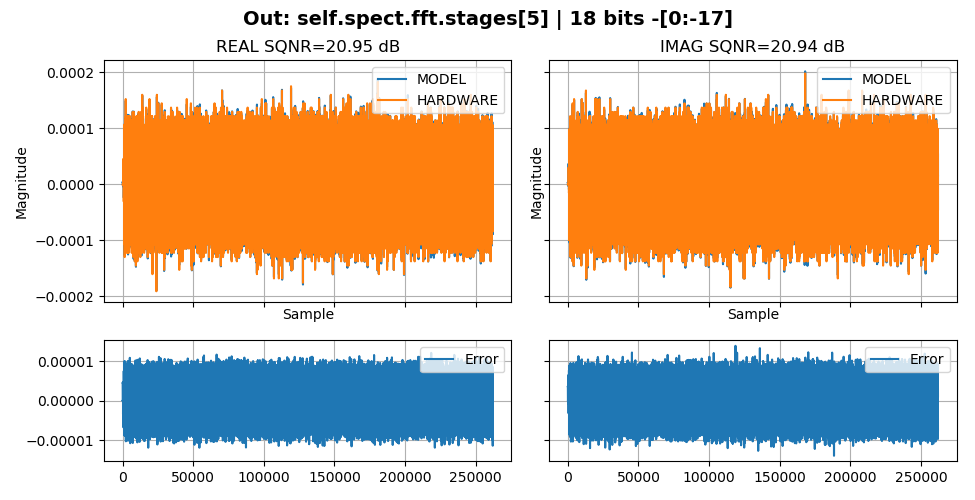

<IPython.core.display.Javascript object>


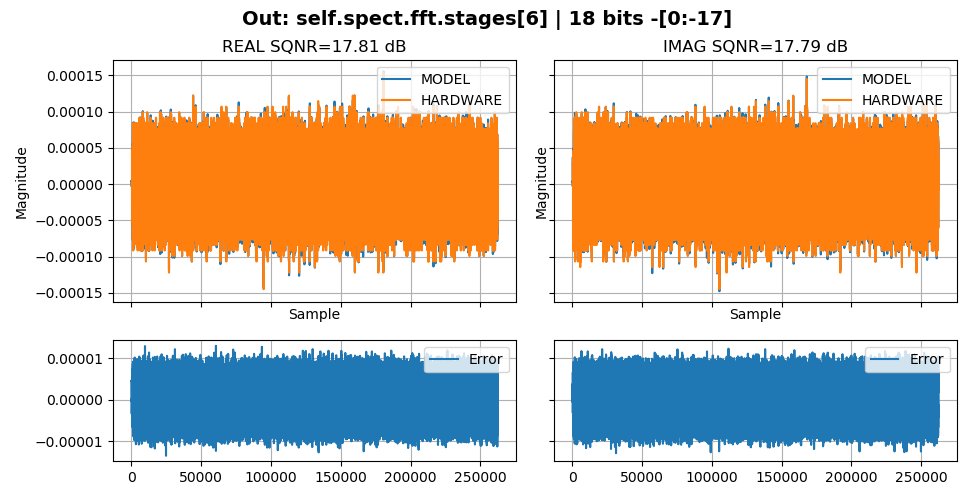

<IPython.core.display.Javascript object>


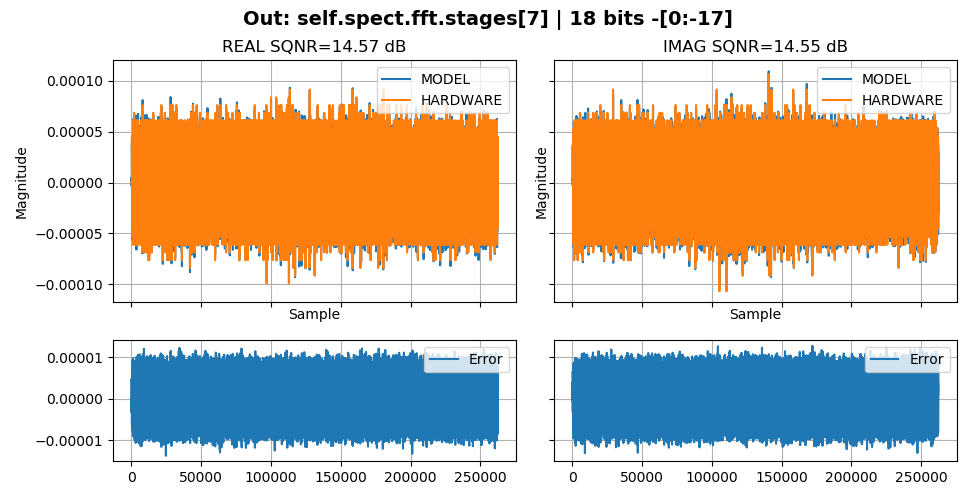

<IPython.core.display.Javascript object>


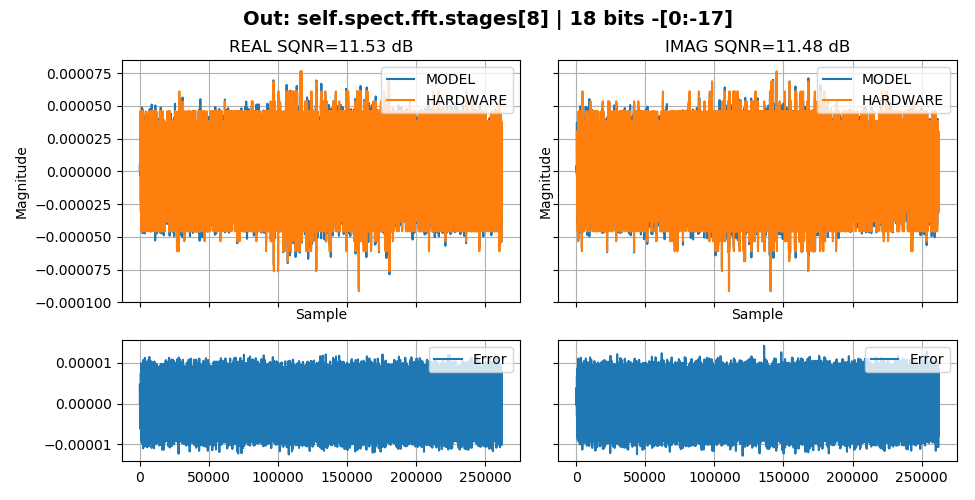

<IPython.core.display.Javascript object>


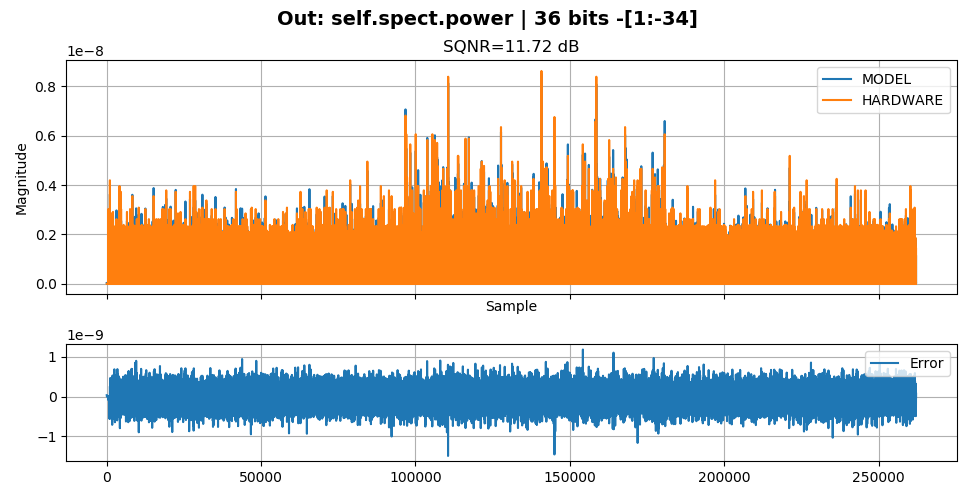

<IPython.core.display.Javascript object>


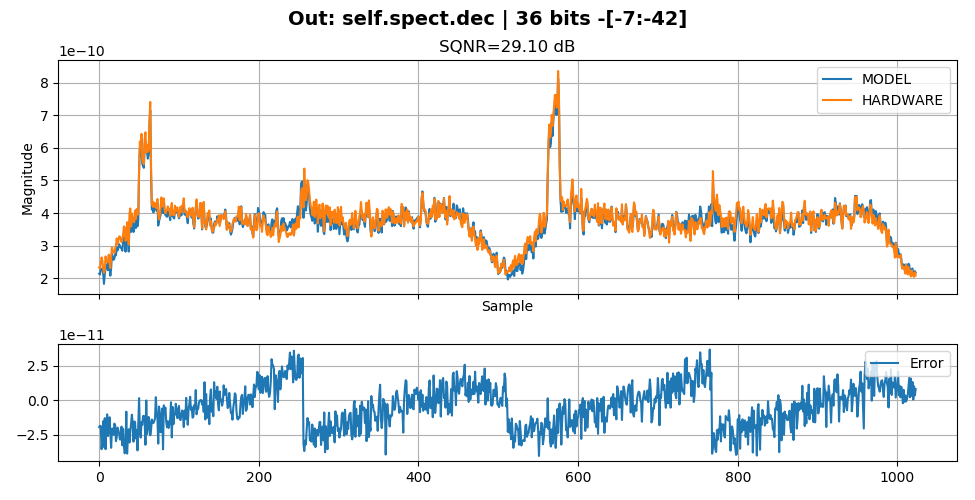

<IPython.core.display.Javascript object>


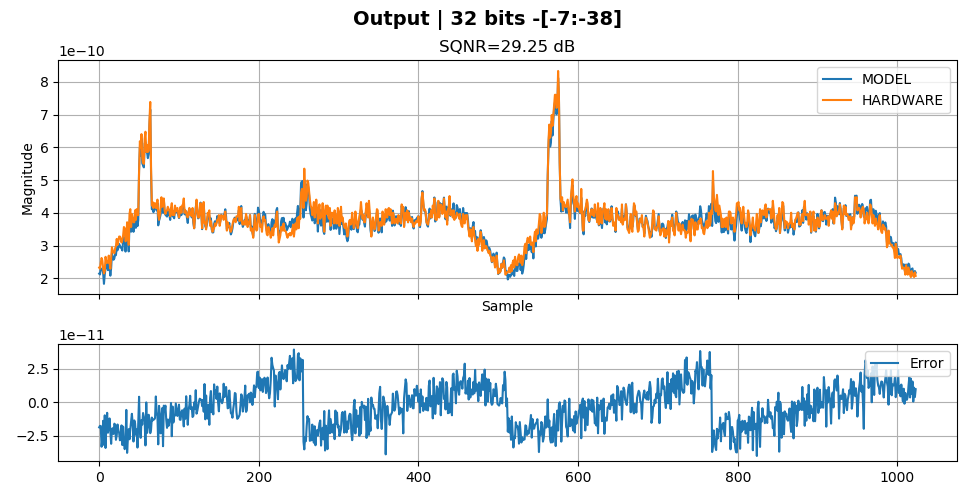

<IPython.core.display.Javascript object>


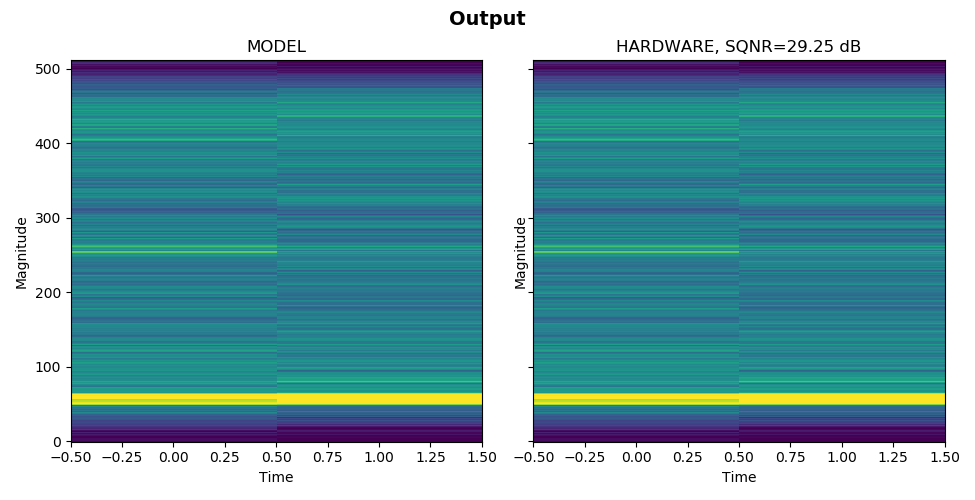

In [6]:
dut = SpectrogramLimeSDR()
crop = dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS
input_signal = load_complex64_file(get_data_file('limem_ph3weak_40m'))
input_signal = input_signal[:len(input_signal) // (crop) * (crop)]

sims_low = simulate(dut, input_signal, trace=True, pipeline_flush='auto')
plot_trace()
plot_imshow(sims_low, name='Output', rows=dut.spect.FFT_SIZE // dut.spect.AVG_FREQ_AXIS, transpose=True)

# Compare HARDWARE vs MODEL

<IPython.core.display.Javascript object>


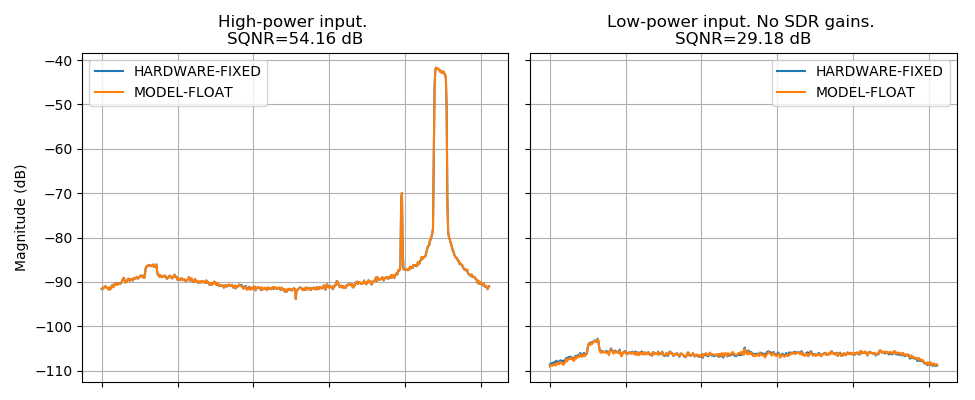

In [39]:
fig = plt.figure(figsize=(9.75, 4))
axes = fig.subplots(1, 2, sharey='all')

# high_power
model_data = np.reshape(sims['MODEL'], (-1, 512))[1]
hw_data = np.reshape(sims['HARDWARE'], (-1, 512))[1]

axes[0].set_title(f'High-power input. \nSQNR={SQNR(model_data, hw_data):.2f} dB')
axes[0].set_ylabel('Magnitude (dB)')
axes[0].plot(np.log10(hw_data) * 10 - 12, label='HARDWARE-FIXED')
axes[0].plot(np.log10(model_data) * 10 - 12, label='MODEL-FLOAT')
axes[0].grid()
axes[0].legend()



# low power
model_data = np.reshape(sims_low['MODEL'], (-1, 512))[1]
hw_data = np.reshape(sims_low['HARDWARE'], (-1, 512))[1]

axes[1].set_title(f'Low-power input. No SDR gains. \nSQNR={SQNR(model_data, hw_data):.2f} dB')
axes[1].plot(np.log10(hw_data) * 10 - 12, label='HARDWARE-FIXED')
axes[1].plot(np.log10(model_data) * 10 - 12, label='MODEL-FLOAT')
axes[1].grid()
axes[1].legend()

plt.setp( axes[0].get_xticklabels(), visible=False)
plt.setp( axes[1].get_xticklabels(), visible=False)
plt.tight_layout()
plt.show()

# Conversion to VHDL and RTL/NETLIST simulations

In [ ]:
dut = SpectrogramLimeSDR()
input_signal = load_complex64_file(get_data_file('limem_ph3weak_40m'))
minimal_input = input_signal[:dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS]
sims = simulate(dut, minimal_input, pipeline_flush='auto', 
                simulations=['MODEL', 'HARDWARE', 'RTL', 'NETLIST'], 
                conversion_path='/tmp/pyha_output')
assert hardware_sims_equal(sims)

# Synthesis:  resource usage and Fmax

In [ ]:
quartus = get_simulator_quartus() # reuse the work that was done during the simulation
print(quartus.get_resource_usage('fit'))
print(quartus.get_fmax())